In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets

In [2]:
np.random.seed(0)

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state= 123, noise = 0.1, factor= 0.2)

print(X)
print(y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

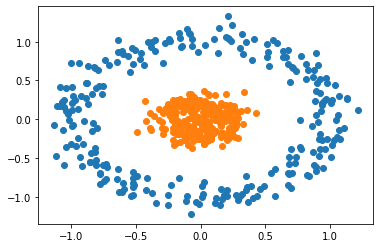

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])#blue
plt.scatter(X[y==1,0],X[y==1,1])#orange


In [5]:
model = Sequential()
model.add(Dense(4,input_shape = (2,),activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01),'binary_crossentropy', metrics= ['accuracy'])

2022-08-20 01:37:07.238133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 01:37:07.248234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-08-20 01:37:07.250625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-20 01:37:07.250703: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required

In [6]:
h = model.fit(x=X,y=y,verbose= 1,batch_size= 20 , epochs= 100, shuffle= 'true')

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6991 - accuracy: 0.4940
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.6700
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4560
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4460
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5700
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.6160
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.6500
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5060
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6220
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5820
Epoch 11/

Text(0.5, 1.0, 'accuracy')

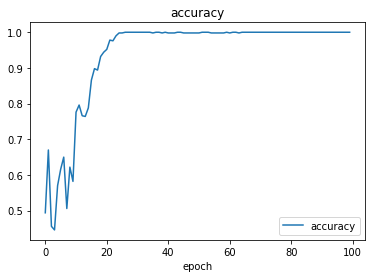

In [7]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

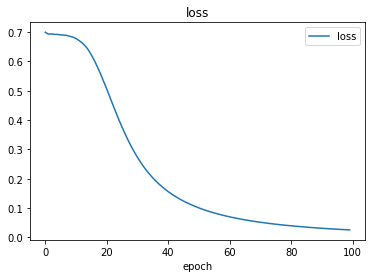

In [8]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [9]:
def plot_decision_boundary(X,Y,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1]) - 1 ,max(X[:,1]) + 1 )
    
    xx, yy = np.meshgrid(x_span,y_span) 
    xx_ , yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 1ms/step


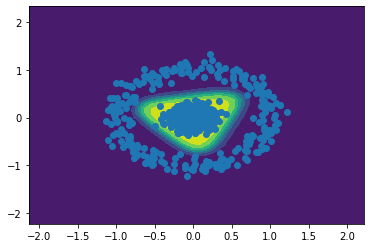

In [10]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 26ms/step
[[0.03938404]]


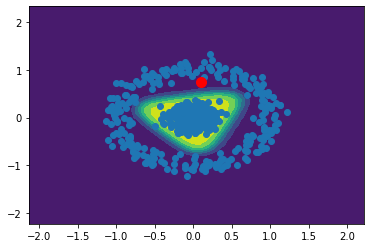

In [11]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0.75

point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker = 'o',markersize = 10, color='red')
print(prediction)
